# Homework 4 Solutions

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Problem 1: $k$-Nearest Neighbors Classifier

**Implement the $k$-NN algorithm in the [Breast Cancer Data Set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) (loaded in the code cell below) using Euclidean distance.**

**In order to successfully implement the $k$-NN algorithm, you should follow all the steps needed to conduct an ML problem.**

**Answer and justify the following questions:**

1. **What happens as you vary $K$ from small to large? Why? Include a plot that shows the accuracy performance as you vary $k$.**

2. **What is the optimal value for $k$ given this data?**

3. **Compute the confusion matrix in the test set using the best value of $k$.**

4. **In a paragraph describe whether or not $k$-NN performs well in high dimensional feature spaces.**

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer(return_X_y=False)

# The data set contains 569 samples and 30 features
X = data.data
print(X.shape)

# Target labels for all 569 samples. Malignant class has labels 0, benign class has label 1
y = data.target
print(y.shape)

(569, 30)
(569,)


In [3]:
# Uncomment the line below for a full data set description
# print(data.DESCR)

## Problem 1.1

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

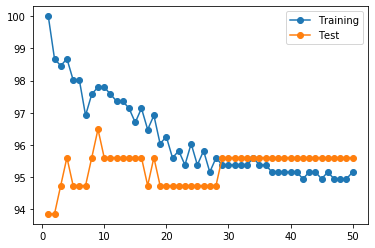

In [5]:
N = 50
kset = np.arange(1,N+1)
Acc = np.zeros((N,2))

for k in kset:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform',metric = 'euclidean')
    clf.fit(X_train, y_train)
    Acc[k-1,:] = [round(clf.score(X_train, y_train)*100,2),round(clf.score(X_test, y_test)*100,2)]

plt.plot(kset, Acc[:,0], '-o', label = 'Training')
plt.plot(kset, Acc[:,1], '-o', label = 'Test')
plt.legend();

As the value of $k$ increases, the accuracy in the training and test sets generally decrease. That is particularly true, when the classes have a high amount of overlap in the feature space.

## Problem 1.2

In [6]:
k = 9
clf = KNeighborsClassifier(n_neighbors=k, weights='uniform',metric = 'euclidean')
clf.fit(X_train, y_train)
print('Training Accuracy: '+str(round(clf.score(X_train, y_train)*100,2)) + '%')
print('Test Accuracy: '+str(round(clf.score(X_test, y_test)*100,2)) + '%')

Training Accuracy: 97.8%
Test Accuracy: 96.49%


Given this data, the optimal parameter is $k=9$ as it performs the best in both training and test sets.

## Problem 1.3

In [7]:
from sklearn.metrics import confusion_matrix

y_predicted = clf.predict(X_test)
confusion_matrix(y_test, y_predicted)

array([[41,  2],
       [ 2, 69]], dtype=int64)

## Problem 1.4

$k$-NN will not perform well in high-dimensions. The Curse of Dimensionality is particularly "harsh" on $k$-NN. In high-dimensions, all the data samples will lay in the corners (as we saw using the "donut" and unit porcupine examples in class) as so every sample will be far away from each other, so the concept of neighbors is somewhat lost.

To combat this issue, we want to perform feature selection or feature extraction to reduce dimensions and then apply $k$-NN.

# Problem 2: Decision Tree

**In order to reduce email load, let's build a decision tree algorithm to decide whether or not to read an email or simply file it away instead. To train the model, consider the data set of binary-valued features about each email, including whether the author is known, whether the email is long or short, whether it has several key words, along with any final decision about whether to read it ($y = 1$ for "read", $y=-1$ for "discard").**

| $x_1$: know author?  | $x_2$:  is long?     | $x_3$:  has research?| $x_4$:  has grade?   | $x_5$:  has lottery?     | $y$:    read?        |
|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|
|          0           |          0           |          1           |          1           |          0           |         -1           |
|          1           |          1           |          0           |          1           |          0           |         -1           |
|          0           |          1           |          1           |          1           |          1           |         -1           |
|          1           |          1           |          1           |          1           |          0           |         -1           |
|          0           |          1           |          0           |          0           |          0           |         -1           |
|          1           |          0           |          1           |          1           |          1           |          1           |
|          0           |          0           |          1           |          0           |          0           |          1           |
|          1           |          0           |          0           |          0           |          0           |          1           |
|          1           |          0           |          1           |          1           |          0           |          1           |
|          1           |          1           |          1           |          1           |          1           |         -1           |

**In the case of any ties, we will prefer to predict class $y = 1$. For the next steps consider $0 \log_2 0 = 0$.**

1. **Compute the information gain (entropy function) for each feature $x_i$. Which feature should be the root node?**

2. **Draw the complete decision tree that will be learned from this data. Justify every split based on information gain at every node.**

## Problem 2.1

In [8]:
import math

In [9]:
# Measuring information gain for feature 1

- 0.4*(3/4 * math.log(3/4,2) + 1/4 * math.log(1/4,2)) - 0.6*(3/6 *math.log(3/6,2) + 3/6*math.log(3/6,2))

0.9245112497836532

In [10]:
# Measuring information gain for feature 2

- 0.5*(1/5 * math.log(1/5,2) + 4/5 * math.log(4/5,2)) - 0.5*(5/5 *math.log(5/5,2) + 0)

0.36096404744368116

In [11]:
# Measuring information gain for feature 3

- 0.3*(2/3 * math.log(2/3,2) + 1/3 * math.log(1/3,2)) - 0.7*(4/7 *math.log(4/7,2) + 3/7 *math.log(3/7,2) )

0.965148445440323

In [12]:
# Measuring information gain for feature 4

- 0.3*(1/3 * math.log(1/3,2) + 2/3 * math.log(2/3,2)) - 0.7*(5/7 *math.log(5/7,2) + 2/7 *math.log(2/7,2) )

0.8796731482129885

In [13]:
# Measuring information gain for feature 5

- 0.7*(4/7 * math.log(4/7,2) + 3/7 * math.log(3/7,2)) - 0.3*(2/3 *math.log(2/3,2) + 1/3 *math.log(1/3,2) )

0.965148445440323

As feature 2 minimizes the entropy, feature 2 will be used as the root node of our decision tree.

## Problem 2.2

Is $x_2 = 0$, then $y=-1$ (do not read the email). And therefore, that is an end node. We need to further split the node when $x_2 = 1$ as it contains 4 samples for which $y=1$ and 1 sample for which $y=-1$.

This is the resulting table of data samples:

| $x_1$: know author?  | $x_2$:  is long?     | $x_3$:  has research?| $x_4$:  has grade?   | $x_5$:  has lottery?     | $y$:    read?        |
|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|
|          0           |          0           |          1           |          1           |          0           |         -1           |
|          1           |          0           |          1           |          1           |          1           |          1           |
|          0           |          0           |          1           |          0           |          0           |          1           |
|          1           |          0           |          0           |          0           |          0           |          1           |
|          1           |          0           |          1           |          1           |          0           |          1           |

In [14]:
# Measuring information gain for feature 1 (at node x2=0)

- (2/5)*(1/2 * math.log(1/2,2) + 1/2 * math.log(1/2,2)) - (3/5)*(0 + 3/3*math.log(3/3,2))

0.4

In [15]:
# Measuring information gain for feature 3 (at node x2=0)

- (1/5)*(0 + 1/1 * math.log(1/1,2)) - (4/5)*(1/4 * math.log(1/4,2) + 3/4*math.log(3/4,2))

0.6490224995673063

In [16]:
# Measuring information gain for feature 4 (at node x2=0)

- (2/5)*(0 + 2/2 * math.log(2/2,2)) - (3/5)*(1/3* math.log(1/3,2) + 2/3*math.log(2/3,2))

0.5509775004326937

In [17]:
# Measuring information gain for feature 5 (at node x2=0)

- (4/5)*(1/4 * math.log(1/4,2) + 3/4 * math.log(3/4,2)) - (1/5)*(0 + 1/1*math.log(1/1,2))

0.6490224995673063

As feature 1 minimizes entropy, that will be the selected feature to further split the node $x_2=1$.

If $x_2=0$ and $x_1 = 1$, then $y=1$ (read the email). So that is a terminal leaf. We need to further split $x_1=0$ as we have 1 sample with $y=-1$ and 1 sample with $y=1$.

This is resulting table of data samples with $x_2=0$ and $x_1=0$:

| $x_1$: know author?  | $x_2$:  is long?     | $x_3$:  has research?| $x_4$:  has grade?   | $x_5$:  has lottery?     | $y$:    read?        |
|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|
|          0           |          0           |          1           |          1           |          0           |         -1           |
|          0           |          0           |          1           |          0           |          0           |          1           |

In [18]:
# Measuring information gain for feature 3 (at node x2=0 and x1=0)

- 0 - (2/2)*(1/2 * math.log(1/2,2) + 1/2*math.log(1/2,2))

1.0

In [19]:
# Measuring information gain for feature 4 (at node x2=0 and x1=0)

- (1/2)*(1/1 * math.log(1/1,2) + 0) - (1/2)*(0 + 1/1*math.log(1/1,2))

-0.0

In [20]:
# Measuring information gain for feature 5 (at node x2=0 and x1=0)

- 0 - (2/2)*(1/2 * math.log(1/2,2) + 1/2*math.log(1/2,2))

1.0

As feature 4 minimizes entropy, then we will use $x_4$ to further split the leaf $x_1=0$. If $x_4=1$ then $y=-1$ (do not read the email), and if $x_4 = -1$ then $y=1$ (read the email).

Let's use lecture 12's code to plot the resulting tree.

In [21]:
X = [[0,0,1,1,0],[1,1,0,1,0],[0,1,1,1,1],[1,1,1,1,0],
     [0,1,0,0,0],[1,0,1,1,1],[0,0,1,0,0],[1,0,0,0,0],
     [1,0,1,1,0],[1,1,1,1,1]]

y = [[-1],[-1],[-1],[-1],[-1],[1],[1],[1],[1],[-1]]

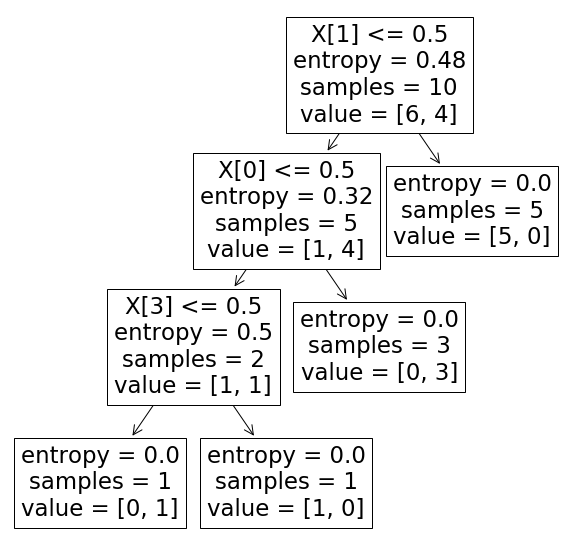

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(10,10))

dt = DecisionTreeClassifier()
tree.plot_tree(dt.fit(X,y));
plt.show()

# Problem 3: Decision Trees

**In this problem you will work with the [Immunotherapy Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset). This data set contains information about wart treatment results of 90 patients using immunotherapy. The data set contains 7 features (sex, age, time, number of warts, type, area and induration diameter). The class label is the "result of treatment", where 0 means not successful and 1 means treatment was successful.**

**Answer the following questions:**

1. **Split the training data into training and test using a 80/20 split.**

2. **Learn a decision tree classifier on the data. Visualize the resulting tree using ```plot_tree``` function from the module ```sklearn.tree``` (there is an example in Lecture 12).**

3. **Now, try varying the maximum depth parameter (```max_depth```), which forces the tree to stop after at most that many levels. Test values $1, 2, 3, 4, 5, 6$ and compare their performance (both training and test) against the full depth. Is complexity increasing or decreasing with the depth cutoff? Identify whether you think the model begins overfitting, and if so, when. If you use this parameter for complexity control, what depth would you choose at best?**

4. **Now, using high maximum depth ($d=6$), use ```min_samples_leaf``` to control complexity. Try values $\{2,4,6\}$. Is complexity increasing or decreasing as ```min_samples_leaf``` grows? Identify when (if) the model is starting to overfit, and what value you would use for this type of complexity control.**

In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_excel('Immunotherapy.xlsx')

In [25]:
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


In [26]:
X = df.iloc[:,:6]
y = df.iloc[:,7]

In [27]:
X.shape, y.shape, np.sum(y==0)/len(y), np.sum(y==1)/len(y)

((90, 6), (90,), 0.2111111111111111, 0.7888888888888889)

## Problem 3.1

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

print(np.sum(y_train==0)/len(y_train), np.sum(y_train==1)/len(y_train))

print(np.sum(y_test==0)/len(y_test), np.sum(y_test==1)/len(y_test))

(72, 6) (72,) (18, 6) (18,)
0.19444444444444445 0.8055555555555556
0.2777777777777778 0.7222222222222222


## Problem 3.2

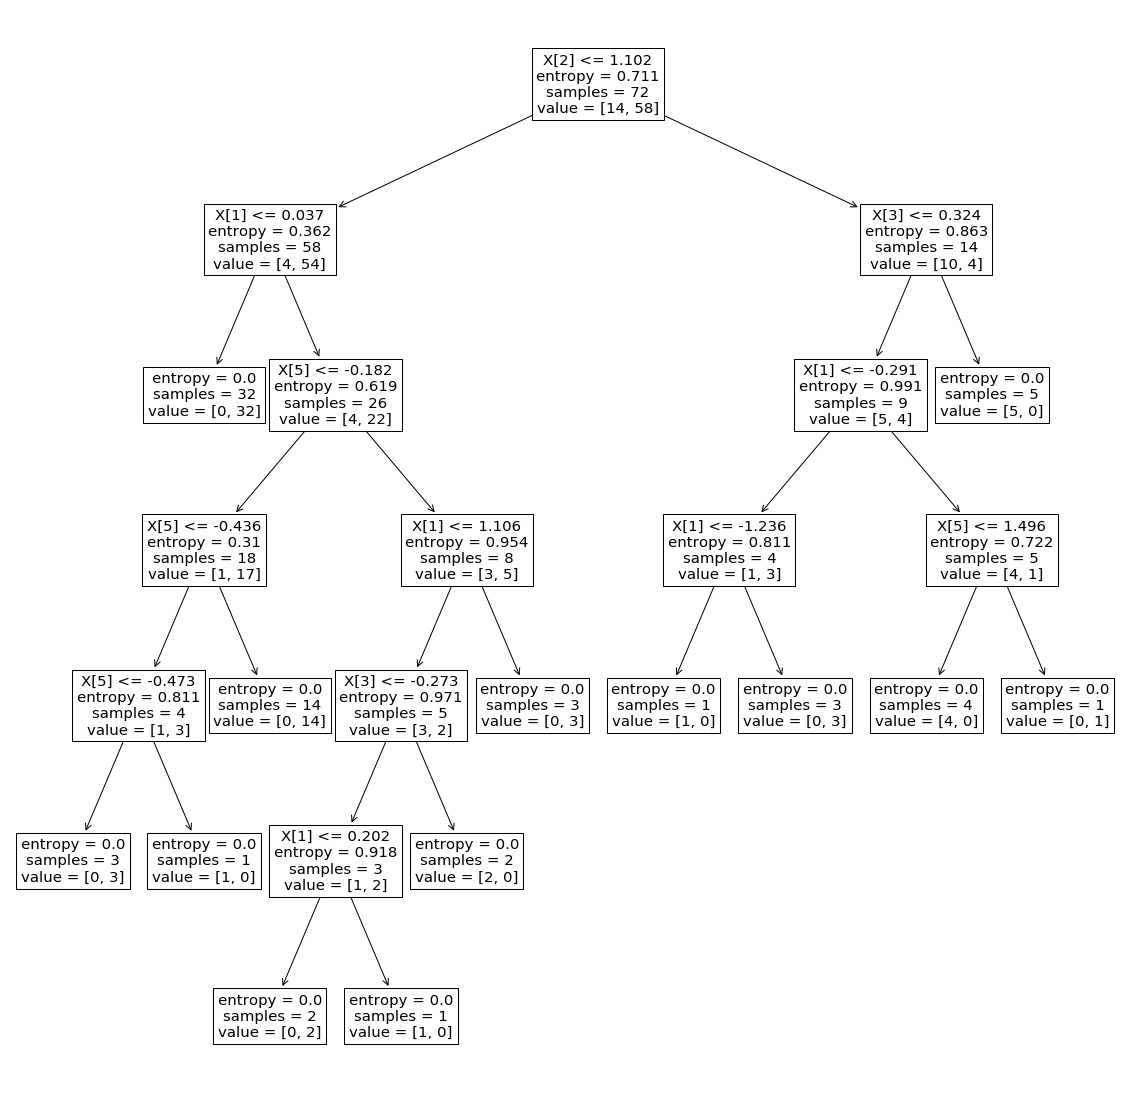

Training Accuracy: 100.0%
Test Accuracy: 83.33333333333334%


In [29]:
plt.figure(figsize=(20,20))

dt = DecisionTreeClassifier(criterion='entropy',random_state=4)
tree.plot_tree(dt.fit(X_train, y_train,));
plt.show()

print('Training Accuracy: ' + str(dt.score(X_train, y_train)*100) + '%')
print('Test Accuracy: ' + str(dt.score(X_test, y_test)*100) + '%')

## Problem 3.3

Depth = 1


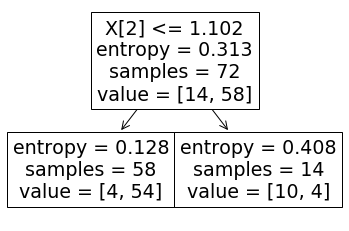

Training Accuracy: 88.88888888888889%
Test Accuracy: 77.77777777777779%
----------------------------------------------------
Depth = 2


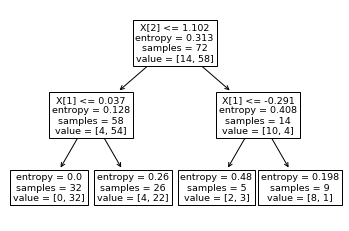

Training Accuracy: 90.27777777777779%
Test Accuracy: 83.33333333333334%
----------------------------------------------------
Depth = 3


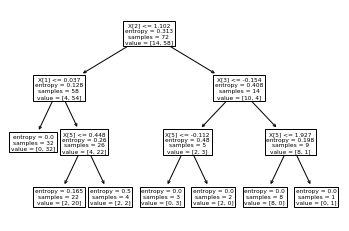

Training Accuracy: 94.44444444444444%
Test Accuracy: 77.77777777777779%
----------------------------------------------------
Depth = 4


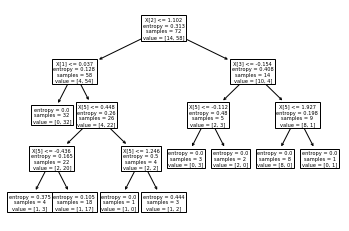

Training Accuracy: 95.83333333333334%
Test Accuracy: 77.77777777777779%
----------------------------------------------------
Depth = 5


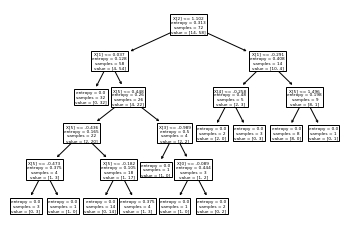

Training Accuracy: 98.61111111111111%
Test Accuracy: 83.33333333333334%
----------------------------------------------------


In [30]:
max_dep = np.arange(1,6)

score_train = []
score_test = []

for i in range(len(max_dep)):
    print('Depth = ' + str(max_dep[i]))
    dt = DecisionTreeClassifier(max_depth=max_dep[i],min_samples_leaf=1,random_state=4)
    dt.fit(X_train, y_train)
    tree.plot_tree(dt)
    plt.show();
    score_train += [dt.score(X_train, y_train)]
    score_test += [dt.score(X_test, y_test)]
    print('Training Accuracy: '+str(dt.score(X_train, y_train)*100)+'%')
    print('Test Accuracy: '+str(dt.score(X_test, y_test)*100)+'%')
    print('----------------------------------------------------')

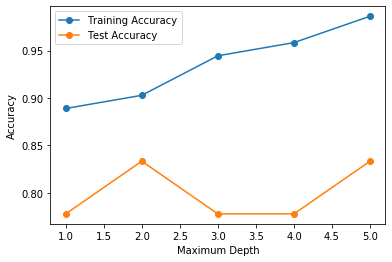

In [31]:
plt.plot(max_dep,score_train,'-o', label='Training Accuracy')
plt.plot(max_dep,score_test,'-o', label='Test Accuracy')
plt.legend()
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy');

As the depth of the decision tree increases, we start to overfitting, as it allows for the tree to learn more about the training set and stop being able to generalize to test set.

From the results, the best performance is achieved with "max_depth" = 2 as the accuracy is at its peak for the test set and it is still performing well in training.

## Problem 3.4

Max Leaf = 1


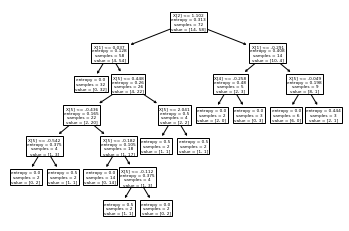

Training Accuracy: 93.05555555555556
Test Accuracy: 72.22222222222221
----------------------------------------------------
Max Leaf = 2


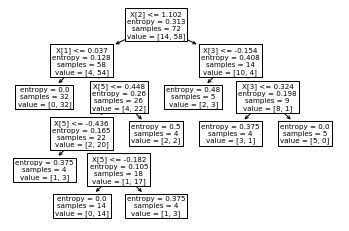

Training Accuracy: 90.27777777777779
Test Accuracy: 77.77777777777779
----------------------------------------------------
Max Leaf = 3


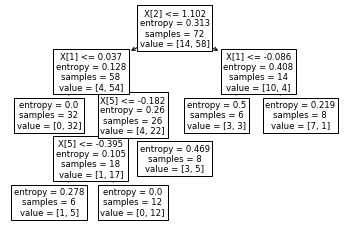

Training Accuracy: 88.88888888888889
Test Accuracy: 77.77777777777779
----------------------------------------------------
Max Leaf = 4


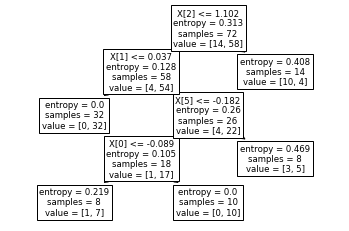

Training Accuracy: 88.88888888888889
Test Accuracy: 77.77777777777779
----------------------------------------------------
Max Leaf = 5


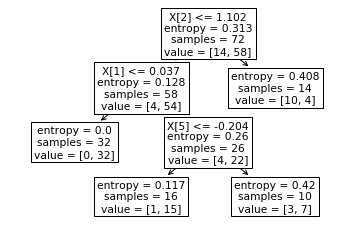

Training Accuracy: 88.88888888888889
Test Accuracy: 77.77777777777779
----------------------------------------------------


In [32]:
max_leaf = [2,4,6,8,10]

score_train = []
score_test = []

for i in range(len(max_leaf)):
    print('Max Leaf = ' + str(max_dep[i]))
    dt = DecisionTreeClassifier(max_depth=6,min_samples_leaf=max_leaf[i],random_state=4)
    dt.fit(X_train, y_train)
    tree.plot_tree(dt)
    plt.show();
    score_train += [dt.score(X_train, y_train)]
    score_test += [dt.score(X_test, y_test)]
    print('Training Accuracy: '+str(dt.score(X_train, y_train)*100))
    print('Test Accuracy: '+str(dt.score(X_test, y_test)*100))
    print('----------------------------------------------------')

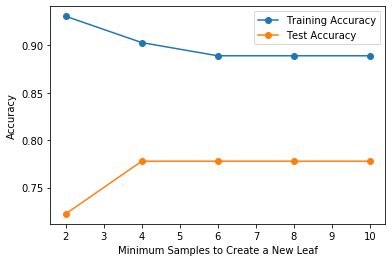

In [33]:
plt.plot(max_leaf,score_train,'-o', label='Training Accuracy')
plt.plot(max_leaf,score_test,'-o', label='Test Accuracy')
plt.legend()
plt.xlabel('Minimum Samples to Create a New Leaf')
plt.ylabel('Accuracy');

As the number of misclassified samples to make a new node split ("min_samples_leaf") increases, we start to **underfit** the training data. 

"min_samples_leaf" controls the minimum number of samples needed in a set in order to create a new tree node. If "max_lead"=1, then we will not allow to have a single misclassifed point in any feature space region, and therefore we will start to overfit.

From the results, the best performance is achieved with "min_samples_leaf" = 4 as the accuracy is at its peak for the test set and it is still performing well in training.

# Problem 4: Random Forests

**In this problem you will also work with the [Immunotherapy Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset).**

**Random Forests are bagged collections of decision trees, which select their decision nodes from bootstrap samples. You can implement this easily in ```BaggingClassifier``` using option ```n_estimators```$=n$, where $n$ is the number of learners.**

**Using your validation split from the previous problem, learn a bagged ensemble of decision trees on the training data and evaluate both training and validation performance.**

**For your individual learners, use high complexity control (depth cutoff 6, ```min_samples_leaf```=1, etc.), since the bagging
will be used to control overfitting.**

* **How many decision trees would you use in your ensemble?**

* **Compare the performance of a single decision tree (with overfitting parameters ```max_depth``` and ```min_samples_leaf```) and a random forests composed on overfitting decision trees. Comment the results.**

In [85]:
from sklearn.ensemble import BaggingClassifier
N = 70
nDT = np.arange(1,N+1)

score_RF = np.zeros((N,2))
for i in nDT:
    tree = DecisionTreeClassifier(max_depth=6,min_samples_leaf=1,random_state=1)
    tree.fit(X_train, y_train);
    score_tree = [round(tree.score(X_train, y_train)*100,2), round(tree.score(X_test, y_test)*100,2)]
    
    bag = BaggingClassifier(tree, n_estimators=i, max_samples=1.0,random_state=1) 
    bag.fit(X_train, y_train);
    score_RF[i-1,:] = [round(bag.score(X_train, y_train)*100,2), round(bag.score(X_test, y_test)*100,2)]

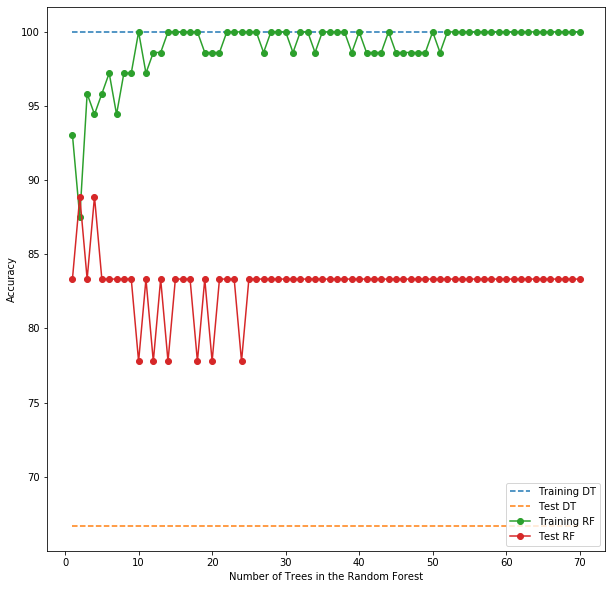

In [86]:
plt.figure(figsize=(10,10))
plt.plot(nDT, score_tree[0]*np.ones(np.size(nDT)),'--', label='Training DT')
plt.plot(nDT, score_tree[1]*np.ones(np.size(nDT)), '--', label='Test DT')
plt.plot(nDT, score_RF[:,0], '-o', label='Training RF')
plt.plot(nDT, score_RF[:,1], '-o', label='Test RF')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Number of Trees in the Random Forest');

Based on the plot above, I would select 4 decision trees in my ensemble learning as it maximizes accuracy in test and performs well in training.

Another observation from the plot above is that the accuracy in training for a single decision tree is 100% but the accuracy in the test set is 66.67%. Regardless on the number of decision trees included in the ensemble, the random forest will always perform better (in terms of *generalization*, that is, the test set accuracy is much higher) than a single decision tree.

As the plot above illustrates, a random forest with a single decision tree is NOT equal to evaluating a single decision tree. It is important to note that individual learners (decision trees) in a random forests are constituted of **bootstrap** samples of the input data.

The accuracy in both training and test sets using a single decision tree and an ensemble of 4 decision trees (random forests) are:

In [80]:
tree = DecisionTreeClassifier(max_depth=6,min_samples_leaf=1,random_state=1)
tree.fit(X_train, y_train);
print('Training Accuracy: ' + str(round(tree.score(X_train, y_train)*100,2)) + '%')
print('Test Accuracy: ' + str(round(tree.score(X_test, y_test)*100,2)) + '%')

bag = BaggingClassifier(tree, n_estimators=4, max_samples=1.0,random_state=1) 
bag.fit(X_train, y_train);
print('Training Accuracy: ' + str(round(bag.score(X_train, y_train)*100,2)) + '%')
print('Test Accuracy: ' + str(round(bag.score(X_test, y_test)*100,2)) + '%')

Training Accuracy: 100.0%
Test Accuracy: 66.67%
Training Accuracy: 94.44%
Test Accuracy: 88.89%


As we see, the random forests are a much more efficient algorithm to avoid overfitting.

# Problem 5: Support Vector Machines

**In this problem you will be working with the [Digits Data Set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).**

**Build a pipeline structure using ```make_pipeline``` that (1) standardizes the data, (2) extracts PCA features, and (3) performs classification using SVM with an RBF kernel.**

1. **Split the data into training and test sets with an 80/20 split.**

2. **Using ```GridSearchCV``` find the best set of parameters for: the parameter ```n_components``` (which control the number of components to project the data onto) in ```PCA``` and the parameters ```C``` (which controls the margin hardness) and ```gamma``` (which controls the size of the radial basis function kernel) in SVM.**

3. **Use the selected model to evaluate the results in both training and test set. Use ```classification_report``` to assess the full classification metric report.**

In [87]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

X.shape, y.shape

((1797, 64), (1797,))

## Problem 5.1

In [88]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

## Problem 5.2

In [89]:
# Setting up the pipeline

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sdc = StandardScaler()
pca = PCA(n_components=2, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(sdc, pca, svc)

In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {'pca__n_components': [2, 5, 10, 30, 40, 50],
              'svc__C': [1, 5, 10, 15, 20, 30],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.009, 0.01, 0.05, 0.1]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 1min 11s
{'pca__n_components': 40, 'svc__C': 15, 'svc__gamma': 0.005}


C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Problem 5.3

In [93]:
model = grid.best_estimator_
predict_train = model.predict(Xtrain)
predict_test = model.predict(Xtest)

In [97]:
from sklearn.metrics import classification_report

print('Classification report for Training Set')
print(classification_report(ytrain, predict_train))
print('------------------------------------------------------')

print('Classification report for Test Set')
print(classification_report(ytest, predict_test))

Classification report for Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       145
           8       0.99      1.00      1.00       144
           9       1.00      0.99      1.00       140

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437

------------------------------------------------------
Classification report for Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
   

# Problem 6: The Perceptron

**Is Rosenblatt's Perceptron a universal learner (universal function approximator)? If no, explain why not. If yes, justify its implications.**

The Rosenblatt's Perceptron is **not** a universal learner. For classification problems, the Rosenblatt's Perceptron is only able to classify linear separable classes. For regression problems, the Rosenblatt's Perceptron is only able to find the best line to fit the data.

# Problem 7: Multi-Layer Perceptron Decision Surface

**The problem that inspired MLPs and the learning rule is the Exclusive OR (XOR) problem.**

$$\text{XOR}(x_1,x_2) = x_1\bar{x}_2 + \bar{x}_1 x_2 $$

| $x_1$ | $x_2$ |  $t$  |
|-------|-------|-------|
|   0   |   0   |   0   |
|   0   |   1   |   1   |
|   1   |   0   |   1   |
|   1   |   1   |   0   |

**Consider the activation function as heaviside function:**

$$\phi(x) = \begin{cases}1, & x> 0 \\ 0, & x \leq 0\end{cases}$$

**Suppose you had the noisy XOR data shown in the figure below. Answer the following questions:**

<div><img src="figures/noisyXOR.png", width="500"><!div>

1. **Design an MLP that can correctly solve this classification problem. (Find the weights and biases' values.)**

2. **What does the decision surface of this network look like graphically? Draw it out by hand.**

3. **For the MLP you designed, what is the predicted label for the test point $[0.5, 0.5]$?**

Check attached file "Problem 7 solutions.pdf" for full solution to this problem. 